In [1]:
#Load the libraryss
import sys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import pip._internal

import matplotlib as mpl
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [2]:
Loan=pd.read_csv("loan.csv", low_memory=False,index_col=0)

In [3]:
Loan.head()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
Loan.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_clean = Loan.dropna(axis=1, how="any", thresh=None, subset=None, inplace=False)
print(df_clean.shape)

(39717, 42)


In [17]:
print(df_clean.describe())

          member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.971700e+04  39717.000000  39717.000000     39717.000000   
mean   8.504636e+05  11219.443815  10947.713196     10397.448868   
std    2.656783e+05   7456.670694   7187.238670      7128.450439   
min    7.069900e+04    500.000000    500.000000         0.000000   
25%    6.667800e+05   5500.000000   5400.000000      5000.000000   
50%    8.508120e+05  10000.000000   9600.000000      8975.000000   
75%    1.047339e+06  15000.000000  15000.000000     14400.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000   
mean     324.561922  6.896893e+04     13.315130      0.146512        0.869200   
std      208.874874  6.379377e+04      6.678594      0.491812        1.070219   
min       15.690000  4.000000e+03      0.000000      0.000000  

In [18]:
print(df_clean.describe())
print("*"*60)
print(df_clean.info())

          member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.971700e+04  39717.000000  39717.000000     39717.000000   
mean   8.504636e+05  11219.443815  10947.713196     10397.448868   
std    2.656783e+05   7456.670694   7187.238670      7128.450439   
min    7.069900e+04    500.000000    500.000000         0.000000   
25%    6.667800e+05   5500.000000   5400.000000      5000.000000   
50%    8.508120e+05  10000.000000   9600.000000      8975.000000   
75%    1.047339e+06  15000.000000  15000.000000     14400.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000   
mean     324.561922  6.896893e+04     13.315130      0.146512        0.869200   
std      208.874874  6.379377e+04      6.678594      0.491812        1.070219   
min       15.690000  4.000000e+03      0.000000      0.000000  

In [19]:
df_clean.shape

(39717, 42)

Total members:  39717
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


(-1.1051161873593136,
 1.10546019153209,
 -1.1061675121252426,
 1.1002936962138339)

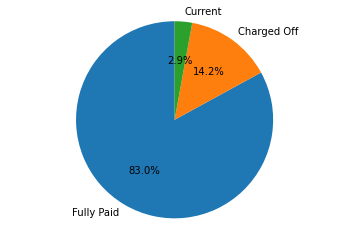

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Total members: ',len(df_clean))
statuses= df_clean['loan_status'].value_counts()
print(statuses)

fig1,ax1 = plt.subplots()

ax=ax1.pie(statuses.values, labels=statuses.index, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nonDefaultMembers = df_clean[df_clean['loan_status']=='Fully Paid']
print('Non Default members: ',len(nonDefaultMembers['member_id']))
print('Non Default members: ',nonDefaultMembers[['loan_amnt','funded_amnt','funded_amnt_inv']])



Non Default members:  32950
Non Default members:           loan_amnt  funded_amnt  funded_amnt_inv
id                                              
1077501       5000         5000           4975.0
1077175       2400         2400           2400.0
1076863      10000        10000          10000.0
1075269       5000         5000           5000.0
1069639       7000         7000           7000.0
...            ...          ...              ...
92187         2500         2500           1075.0
90665         8500         8500            875.0
90395         5000         5000           1325.0
90376         5000         5000            650.0
87023         7500         7500            800.0

[32950 rows x 3 columns]


In [13]:
print(len(df_clean))

39717


In [14]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  pymnt_plan      

In [8]:
# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots # It's useful to we get some tools of plotly
from plotly.subplots import make_subplots as tls
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [16]:
tr0 = go.Bar(
            x = df_clean[df_clean["loan_status"]== 'Fully Paid']["loan_status"].value_counts().index.values,
            y = df_clean[df_clean["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values,
            name='Good Loan'
    )

tr1 = go.Bar(
            x = df_clean[df_clean["loan_status"]== 'Charged Off']["loan_status"].value_counts().index.values,
            y = df_clean[df_clean["loan_status"]== 'Charged Off']["loan_status"].value_counts().values,
            name='Bad Loan'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Dependent variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [21]:
df_clean['loan_amnt_bkt'] = pd.cut(df_clean['loan_amnt'],5)

/var/folders/v0/crw6hpps0ds1np664__hn8dm0000gn/T/ipykernel_67885/640891630.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df_clean['loan_amnt_bkt'].value_counts()

(465.5, 7400.0]       14951
(7400.0, 14300.0]     13218
(14300.0, 21200.0]     7313
(21200.0, 28100.0]     2958
(28100.0, 35000.0]     1277
Name: loan_amnt_bkt, dtype: int64

In [19]:
df_clean.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,loan_amnt_bkt
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,...,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,"(465.5, 7400.0]"
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,...,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,"(465.5, 7400.0]"
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,...,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,"(465.5, 7400.0]"
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,...,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,"(7400.0, 14300.0]"
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,...,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,"(465.5, 7400.0]"


<AxesSubplot:xlabel='loan_amnt_bkt'>

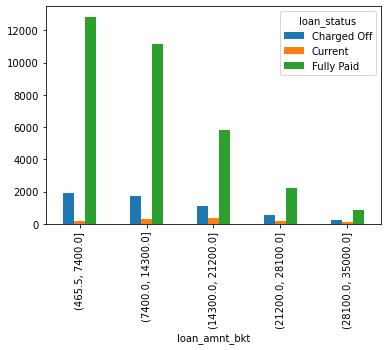

In [20]:
df_clean.groupby('loan_amnt_bkt').loan_status.value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='loan_amnt_bkt'>

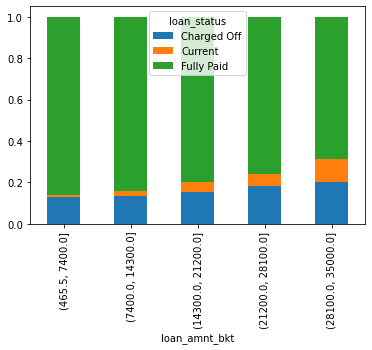

In [21]:
df_clean.groupby('loan_amnt_bkt').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)

In [22]:

df_good = df_clean.loc[df_clean["loan_status"] == 'Fully Paid']['loan_amnt'].values.tolist()
df_bad = df_clean.loc[df_clean["loan_status"] == 'Charged Off']['loan_amnt'].values.tolist()
df_loan_amnt = df_clean['loan_amnt'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Applicants"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Applicants"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall Loan"
)

#Creating the grid
fig = tls(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Loan Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/Users/praveen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/praveen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



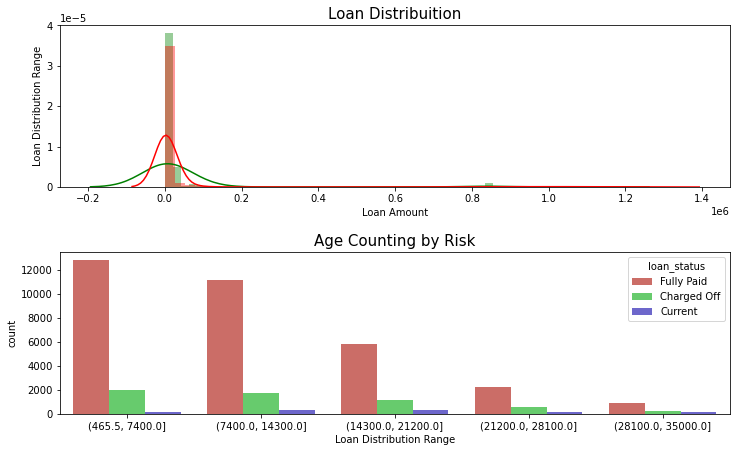

In [24]:
df_good = df_clean[df_clean["loan_status"] == 'Fully Paid']
df_bad = df_clean[df_clean["loan_status"] == 'Charged Off']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)
#loan_amnt_bkt_mean = df.loan_amnt_bkt.mean()

amnt_distribution= df_good.groupby('loan_amnt_bkt').mean()

g1 = sns.distplot(amnt_distribution, ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad.groupby('loan_amnt').mean(), ax=ax[0], 
             color='r')
g1.set_title("Loan Distribuition", fontsize=15)
g1.set_xlabel("Loan Amount")
g1.set_ylabel("Loan Distribution Range")

g2 = sns.countplot(x="loan_amnt_bkt",data=df_clean, 
              palette="hls", ax=ax[1], 
              hue = "loan_status")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Loan Distribution Range")
plt.show()


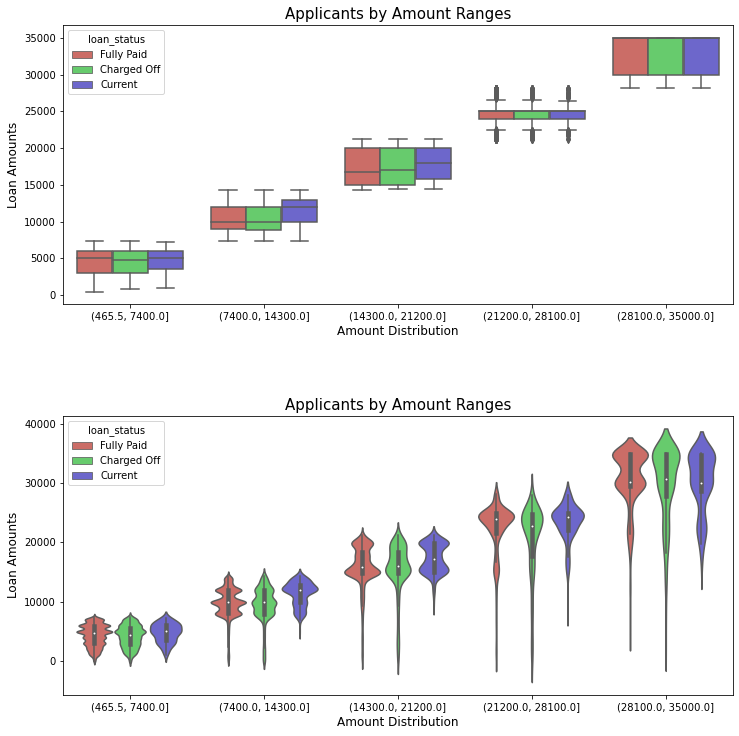

In [31]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="loan_amnt_bkt", y="loan_amnt", data=df_clean, 
            palette="hls", ax=ax[0], hue="loan_status")
g1.set_title("Applicants by Amount Ranges", fontsize=15)
g1.set_xlabel("Amount Distribution", fontsize=12)
g1.set_ylabel("Loan Amounts", fontsize=12)

g2 = sns.violinplot(x="loan_amnt_bkt", y="funded_amnt_inv", data=df_clean, ax=ax[1],  
               hue="loan_status",  palette="hls")
g2.set_title("Applicants by Amount Ranges", fontsize=15)
g2.set_xlabel("Amount Distribution", fontsize=12)
g2.set_ylabel("Loan Amounts", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
print("Description of Distribuition Loan applicants by Risk:  ")


fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
print(df_clean.describe())